<a href="https://colab.research.google.com/github/Mingyang0816/Startup-Founders-Graph-Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Notebook

Performed basic data cleaning and analysis on web-scraped data. Aimed to determine the "success" of startup founders using the following metrics:

*   Author position in journal published
*   Total number of citations per year
*   Depth and breadth of research fields
*   Number of journals published in influential publications (IEEE and Nature)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Entrepreneur Publications

In [ ]:
# Load data
entre_pubs = pd.read_excel("entrepreneur_pubs.xlsx")

In [ ]:
# Convert year into strings
entre_pubs["year"] = entre_pubs["year"].astype(str)
entre_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5,Nature biotechnology 27,2009,1736,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Emily Leproust,The DNA-encoded nucleosome organization of a e...,"['N Kaplan', 'IK Moore', 'Y Fondufe-Mittendorf...",7,Nature 458,2009,1430,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Emily Leproust,Targeted and genome-scale strategies reveal ge...,"['MP Ball', 'JB Li', 'Y Gao', 'JH Lee', 'EM Le...",5,Nature biotechnology 27,2009,1243,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Emily Leproust,"Towards practical, high-capacity, low-maintena...","['N Goldman', 'P Bertone', 'S Chen', 'C Dessim...",6,Nature 494,2013,1219,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Emily Leproust,Mapping long-range promoter contacts in human ...,"['B Mifsud', 'F Tavares-Cadete', 'AN Young', '...",7,Nature genetics 47,2015,1023,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
# Check data types
entre_pubs.dtypes

,0
researcher,object
title,object
authors,object
position,int64
publication,object
year,object
num_citations,int64
citation_link,object


In [ ]:
def author_pos(df):
    '''
    Calculate frequency of each author appearing in each position.

    Parameters
    ----------
    df: dataframe consisting of research publications

    Return
    ------
    pos_df: dataframe indicating frequency of each author appearing
            in each position
    '''

    # Group by researcher and position, then count occurrences
    pos_df = df.groupby("researcher")[["position"]].value_counts()

    # Reset index and sort values
    pos_df = pos_df.reset_index(name = "Counts").sort_values(by = ["researcher", "position"])

    return pos_df

In [ ]:
entre_pos = author_pos(entre_pubs)
entre_pos.head(5)

,researcher,position,Counts
0,Chris Urmson,1,20
1,Chris Urmson,2,13
2,Chris Urmson,3,7
3,Chris Urmson,4,4
5,Chris Urmson,5,3


In [ ]:
def plot_author_pos(pos_df, num_rows, num_cols, figsize, title):
    '''
    Plot frequency of each author appearing in each position.

    Parameters
    ----------
    pos_df: dataframe indicating frequency of each author appearing
            in each position
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot
    title: title of plot

    '''

    # Create base figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Flatten array of subplot axes
    axes = axes.flatten()

    # Lists of unique founders and positions
    founders = pos_df["researcher"].unique()
    positions = sorted(pos_df["position"].unique())

    for idx, founder in enumerate(founders):

        # Filter rows corresponding to founder
        founder_df = pos_df[pos_df["researcher"] == founder]

        # Get current subplot index
        ax = axes[idx]

        # Create barplot
        sns.barplot(x = "position", y = "Counts", data = founder_df, hue = "position", palette = "Blues_d",  order = positions, legend = False, ax = ax)
        ax.set(xlabel = "Author Position",
              xlim = (-1, 7),
              ylabel = "Number of Papers",
              title = f"{founder}")

    fig.suptitle(title, fontsize = 18, y = 0.95)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    plt.show()

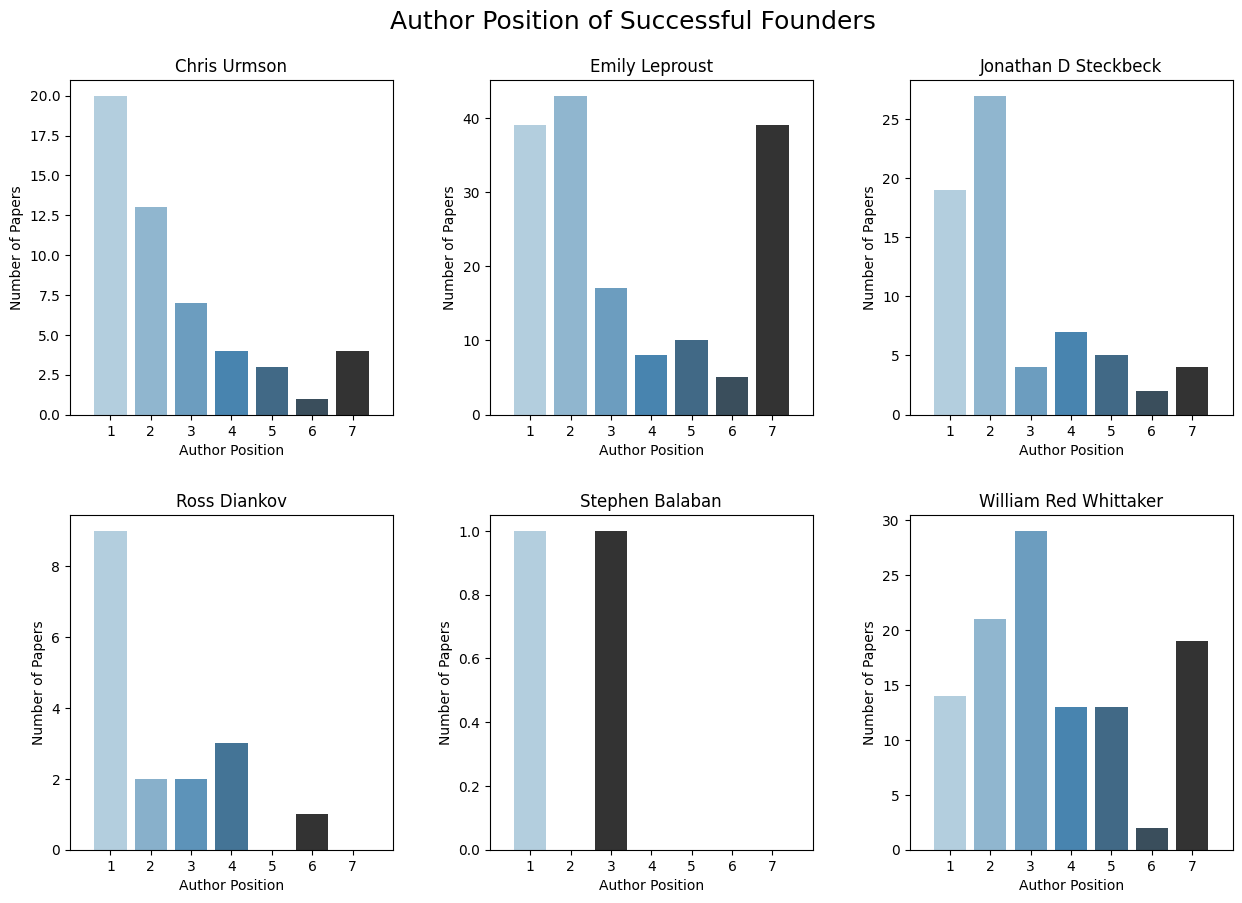

In [ ]:
plot_author_pos(entre_pos, 2, 3, (15, 10), "Author Position of Successful Founders")

In [ ]:
def citations_by_year(df):
    '''
    Calculate number of citations for each founder by year.

    Parameters
    ----------
    df: dataframe consisting of research publications

    Return
    ------
    pivot_table: dataframe indicating number of citations
                 for each founder by year
    '''

    # Filter out rows with no year
    df_with_year = df[df["year"] != "No year"]

    # Group by founder and year, then calculate total citations
    num_cit_df = df_with_year.groupby(["researcher", "year"])[["num_citations"]].sum().reset_index()

    # Create pivot table
    pivot_table = num_cit_df.pivot(index = "year", columns = "researcher", values = "num_citations").sort_index()

    # Fill in missing values
    pivot_table = pivot_table.fillna(0)

    return pivot_table

In [ ]:
# Create pivot table
entre_pivot = citations_by_year(entre_pubs)

# Reposition founders
columns = list(entre_pivot.columns)
columns[2], columns[5] = columns[5], columns[2]
entre_pivot = entre_pivot[columns]

entre_pivot.head(5)

researcher,Chris Urmson,Emily Leproust,William Red Whittaker,Ross Diankov,Stephen Balaban,Jonathan D Steckbeck
year,,,,,,
1985,0.0,0.0,380.0,0.0,0.0,0.0
1986,0.0,0.0,172.0,0.0,0.0,0.0
1989,0.0,0.0,62.0,0.0,0.0,0.0
1990,0.0,0.0,2.0,0.0,0.0,0.0
1991,0.0,0.0,36.0,0.0,0.0,0.0


In [ ]:
def plot_across_years(pivot_table, founders_per_plot, num_rows, num_cols, figsize, ylab, title):
    '''
    Plot number of citations of each founder by year.

    Parameters
    ----------
    pivot_table: dataframe indicating number of citations
                 for each founder by year
    founders_per_plot: number of founders displayed in each subplot
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot
    ylab: label for y axis
    title: title of plot

    '''

    # List of colors
    color_map = ["#489fb5", "#de9272", "#90bda8", "#f2d86a", "#cc397b"]

    # Create base figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Flatten array of subplot axes
    axes = axes.flatten()

    for i, ax in enumerate(axes):

        # List of founders for current subplot
        start = i * founders_per_plot
        end = start + founders_per_plot
        founders = pivot_table.columns[start:end]

        # Create line plot for each founder
        for idx, founder in enumerate(founders):
            ax.plot(pivot_table.index, pivot_table[founder], label = founder, color = color_map[idx])
            ax.set(xlabel = "Year Published",
                  ylabel = ylab,
                  title = title)
            ax.set_xticks(pivot_table.index, labels = pivot_table.index, rotation = 45)
            ax.legend(title = "Founder")

    plt.subplots_adjust(hspace = 0.3)
    plt.show()

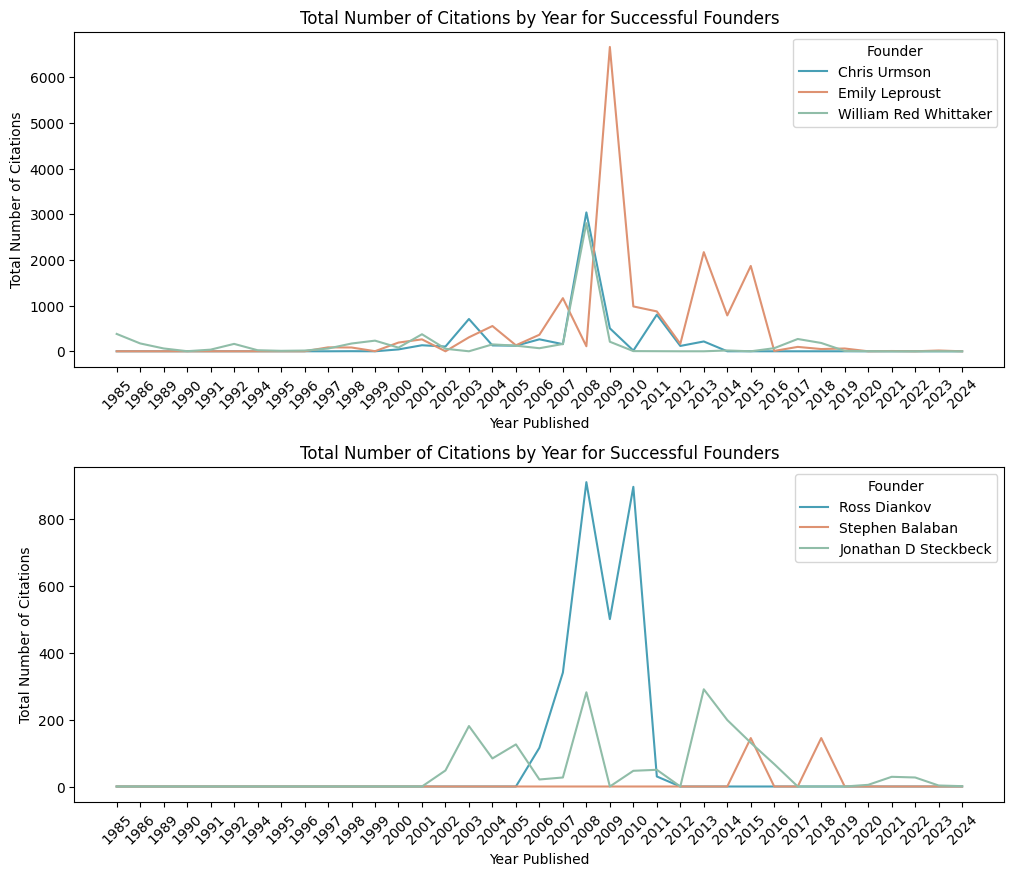

In [ ]:
plot_across_years(entre_pivot, 3, 2, 1, (12, 10), "Total Number of Citations", "Total Number of Citations by Year for Successful Founders")

In [ ]:
# Rename publication journals + include field for Nature

def create_journal_with_fields(pub):

    if pub.startswith("Nat") and not pub.split(" ")[1].startswith("Acad"):
        journal = re.sub(r"\d+\s*$", "", pub).title()
        field = journal.split(" ")[1]
        if field == "Genetics":
            journal = "Nature Genet."
        elif field == "Communications":
            journal = "Nature Comm."
        elif field == "Biotechnology":
            journal = "Nature Biotech."
        elif field == "Reviews":
            journal = "Nature Reviews"
        journal = journal.rstrip()
        return journal

    elif pub.startswith("Genome"):
        return re.sub(r"\d+\s*$", "", pub)

    elif "plos" in pub.lower():
        return "PLOS"

    elif ("journal" in pub.lower() or "j." in pub.lower()) and "virol" in pub.lower():
        return "J. of Virol."

    elif "nat" in pub.lower() and "acad" in pub.lower():
        return "Nat. Acad. of Sciences"

    elif "nucleic acids research" in pub.lower():
        return "Nucl. Acids Res."

    elif "cancer research" in pub.lower():
        return "Cancer Research"

    elif "elife" in pub.lower():
        return "eLife"

    elif "journal of biological chemistry" in pub.lower():
        return "J. of Bio. Chem."

    elif "molecular cell" in pub.lower():
        return "Molecular Cell"

    elif "chemical comm" in pub.lower():
        return "Chem. Comm."

    elif "polymer chem" in pub.lower():
        return "Polymer Chem."

    elif "phys" in pub.lower() and "fluids" in pub.lower():
        return "Physics of Fluids"

    elif "journal of fluid mechanics" in pub.lower():
        return "J. of Fluid Mech."

    elif "neural information processing systems" in pub.lower():
        return "NeurIPS"

    elif "journal" in pub.lower() and "field" in pub.lower():
        return "Field Robotics"

    elif "hiv medicine" in pub.lower():
        return "HIV Med."

    elif "icra" in pub.lower():
        return "ICRA"

    elif "ieee/rsj" in pub.lower():
        return "IROS"

    elif "sairas" in pub.lower():
        return "i-SAIRAS"

    elif "international journal of robotics research" in pub.lower():
        return "IJRR"

    elif "physics of plasmas" in pub.lower():
        return "Physics of Plasmas"

    elif pub.startswith("Science"):
        return "Science"

    elif pub.startswith("Cell"):
        return "Cell"

    elif "ieee" in pub.lower():
        return "IEEE"

    else:
        return "Others"

In [ ]:
entre_pubs["journal_with_field"] = entre_pubs["publication"].apply(create_journal_with_fields)

In [ ]:
# Binary field to determine if journal is published in Nature

def create_nature(pub):

    if "Nature" in pub:
        return 1

    else:
        return 0

In [ ]:
entre_pubs["nature"] = entre_pubs["journal_with_field"].apply(create_nature)

In [ ]:
# Binary field to determine if journal is published in IEEE

def create_ieee(pub):

    if "IEEE" in pub or "ICRA" in pub or "IROS" in pub:
        return 1

    else:
        return 0

In [ ]:
entre_pubs["ieee"] = entre_pubs["journal_with_field"].apply(create_ieee)

In [ ]:
def plot_journal(pubs_df, num_rows, num_cols, figsize, title):
    '''
    Plot distribution across different publication journals for each founder.

    Parameters
    ----------
    pubs_df: dataframe consisting of research publications
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot
    title: title of plot

    '''

    # Group by researcher and publication journal, then calculate frequency
    grouped_df = pubs_df.groupby("researcher")[["journal_with_field"]].value_counts()

    # Reset index and sort values
    grouped_df = grouped_df.reset_index(name = "Count").sort_values(by = ["researcher", "journal_with_field"])

    # Filter out redundant rows
    grouped_df = grouped_df[(grouped_df["Count"] > 0) & (grouped_df["journal_with_field"] != "Others")]

    # Create base figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Flatten array of subplot axes
    axes = axes.flatten()

    # List of founders
    founders = grouped_df["researcher"].unique()

    for idx, founder in enumerate(founders):

        # Filter rows corresponding to founder
        founder_df = grouped_df[grouped_df["researcher"] == founder]

        # Get current subplot index
        ax = axes[idx]

        # Create bar plot
        sns.barplot(x = "journal_with_field", y = "Count", data = founder_df, hue = "Count", palette = "Blues_d",  legend = False, ax = ax)
        ax.set(xlabel = "Journal",
              ylabel = "Number of Papers",
              title = f"{founder}")
        ax.set_xticks(range(len(founder_df["journal_with_field"].unique())))
        ax.set_xticklabels(founder_df["journal_with_field"].unique(), rotation=45, ha='right')

    fig.suptitle(title, fontsize = 18, y = 0.95)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.8)
    plt.show()

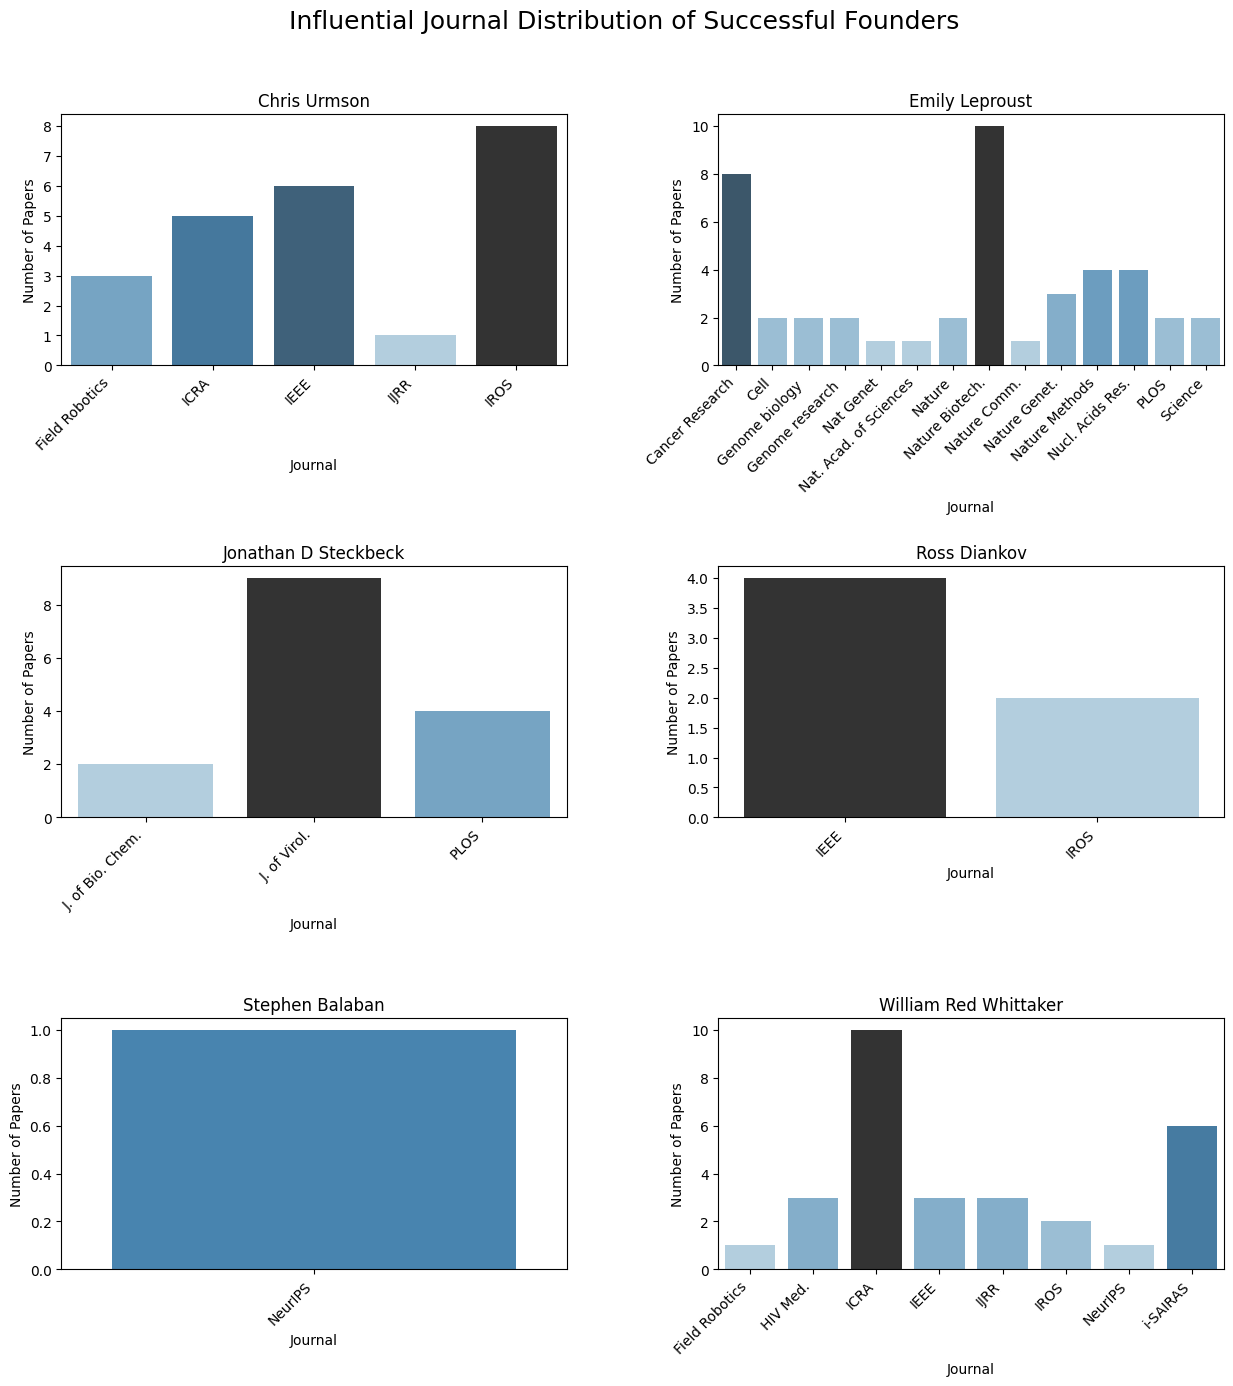

In [ ]:
plot_journal(entre_pubs, 3, 2, (15, 15), "Influential Journal Distribution of Successful Founders")

In [ ]:
def plot_nature(pubs_df, founders_per_plot, num_rows, num_cols, figsize, ylab, title):
    '''
    Plot number of Nature journals published by each founder per year.

    Parameters
    ----------
    pubs_df: dataframe consisting of research publications
    founders_per_plot: number of founders displayed in each subplot
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot
    ylab: label for y axis
    title: title of plot

    '''

    # Filter out rows with no year
    df_with_year = pubs_df[pubs_df["year"] != "No year"]

    # Group by founder and year, then calculate total number of Nature journals
    grouped_df = df_with_year.groupby(["researcher", "year"])[["nature"]].sum().reset_index()

    # Filter researchers with at least 1 Nature journal
    grouped_df = grouped_df.groupby("researcher").filter(lambda x: x["nature"].sum() > 0)

    # Create pivot table
    pivot_table = grouped_df.pivot(index = "year", columns = "researcher", values = "nature").sort_index()

    # Fill in missing values
    pivot_table = pivot_table.fillna(0)

    # Plot number of Nature journals published per year
    plot_across_years(pivot_table, founders_per_plot, num_rows, num_cols, figsize, ylab, title)

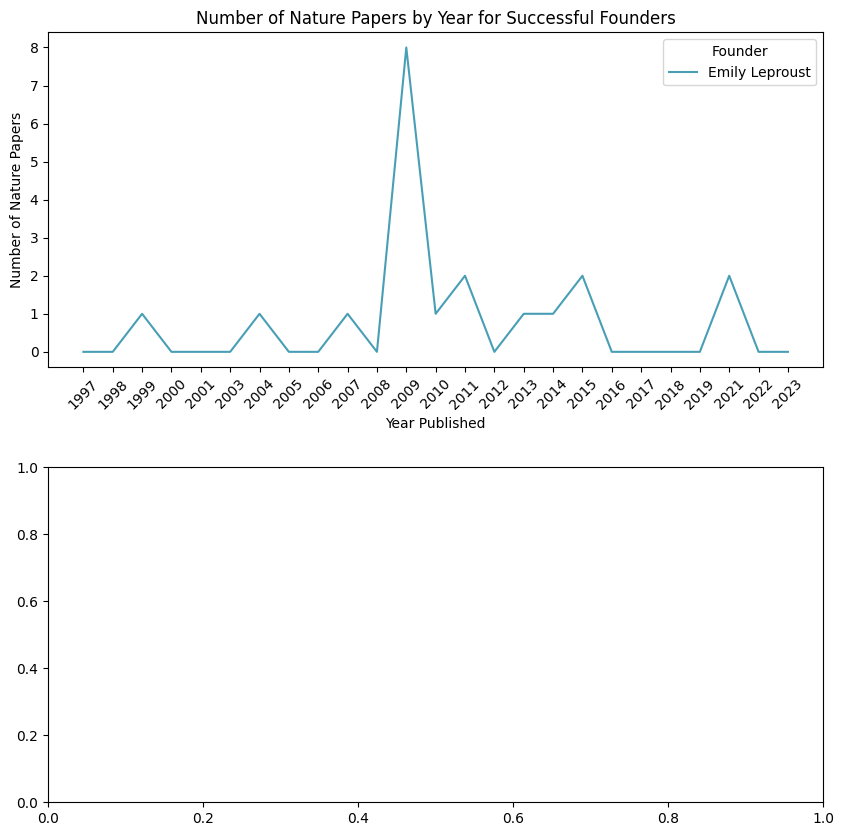

In [ ]:
plot_nature(entre_pubs, 1, 2, 1, (10, 10), "Number of Nature Papers", "Number of Nature Papers by Year for Successful Founders")

In [ ]:
def plot_ieee(pubs_df, founders_per_plot, num_rows, num_cols, figsize, ylab, title):
    '''
    Plot number of IEEE journals published by each founder per year.

    Parameters
    ----------
    pubs_df: dataframe consisting of research publications
    founders_per_plot: number of founders displayed in each subplot
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot
    ylab: label for y axis
    title: title of plot

    '''

    # Filter out rows with no year
    df_with_year = pubs_df[pubs_df["year"] != "No year"]

    # Group by founder and year, then calculate total number of IEEE journals
    grouped_df = df_with_year.groupby(["researcher", "year"])[["ieee"]].sum().reset_index()

    # Filter researchers with at least 1 IEEE journal
    grouped_df = grouped_df.groupby("researcher").filter(lambda x: x["ieee"].sum() > 0)

    # Create pivot table
    pivot_table = grouped_df.pivot(index = "year", columns = "researcher", values = "ieee").sort_index()

    # Fill in missing values
    pivot_table = pivot_table.fillna(0)

    # Plot number of IEEE journals published per year
    plot_across_years(pivot_table, founders_per_plot, num_rows, num_cols, figsize, ylab, title)

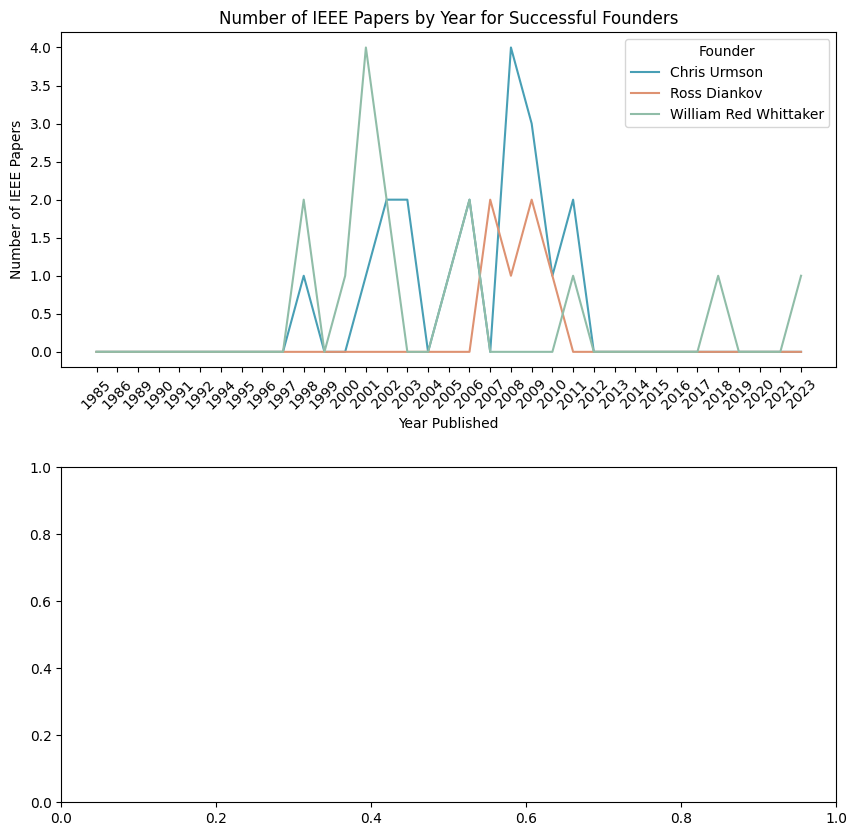

In [ ]:
plot_ieee(entre_pubs, 3, 2, 1, (10, 10), "Number of IEEE Papers", "Number of IEEE Papers by Year for Successful Founders")

# Founder Publications

In [ ]:
founder_pubs = pd.read_excel("founder_pubs.xlsx")

In [ ]:
founder_pubs["year"] = founder_pubs["year"].astype(str)
founder_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Leonard Charles Jarrott,Constraints on sub-GeV dark-matter–electron sc...,"['P Agnes', 'IFM Albuquerque', 'T Alexander', ...",7,Physical review letters 121,2018,274,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Leonard Charles Jarrott,Lawson criterion for ignition exceeded in an i...,"['H Abu-Shawareb', 'R Acree', 'P Adams', 'J Ad...",7,Physical review letters 129,2022,271,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Leonard Charles Jarrott,Focusing of short-pulse high-intensity laser-a...,"['T Bartal', 'ME Foord', 'C Bellei', 'MH Key',...",7,Nature Physics 8,2012,170,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Leonard Charles Jarrott,Design of inertial fusion implosions reaching ...,"['AL Kritcher', 'CV Young', 'HF Robey', 'CR We...",7,Nature Physics 18,2022,136,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
founder_pos = author_pos(founder_pubs)
founder_pos.head(5)

,researcher,position,Counts
0,Austin Draycott,1,3
1,Austin Draycott,2,1
3,Austin Draycott,3,1
2,Austin Draycott,6,1
5,Christopher R Carlson,1,3


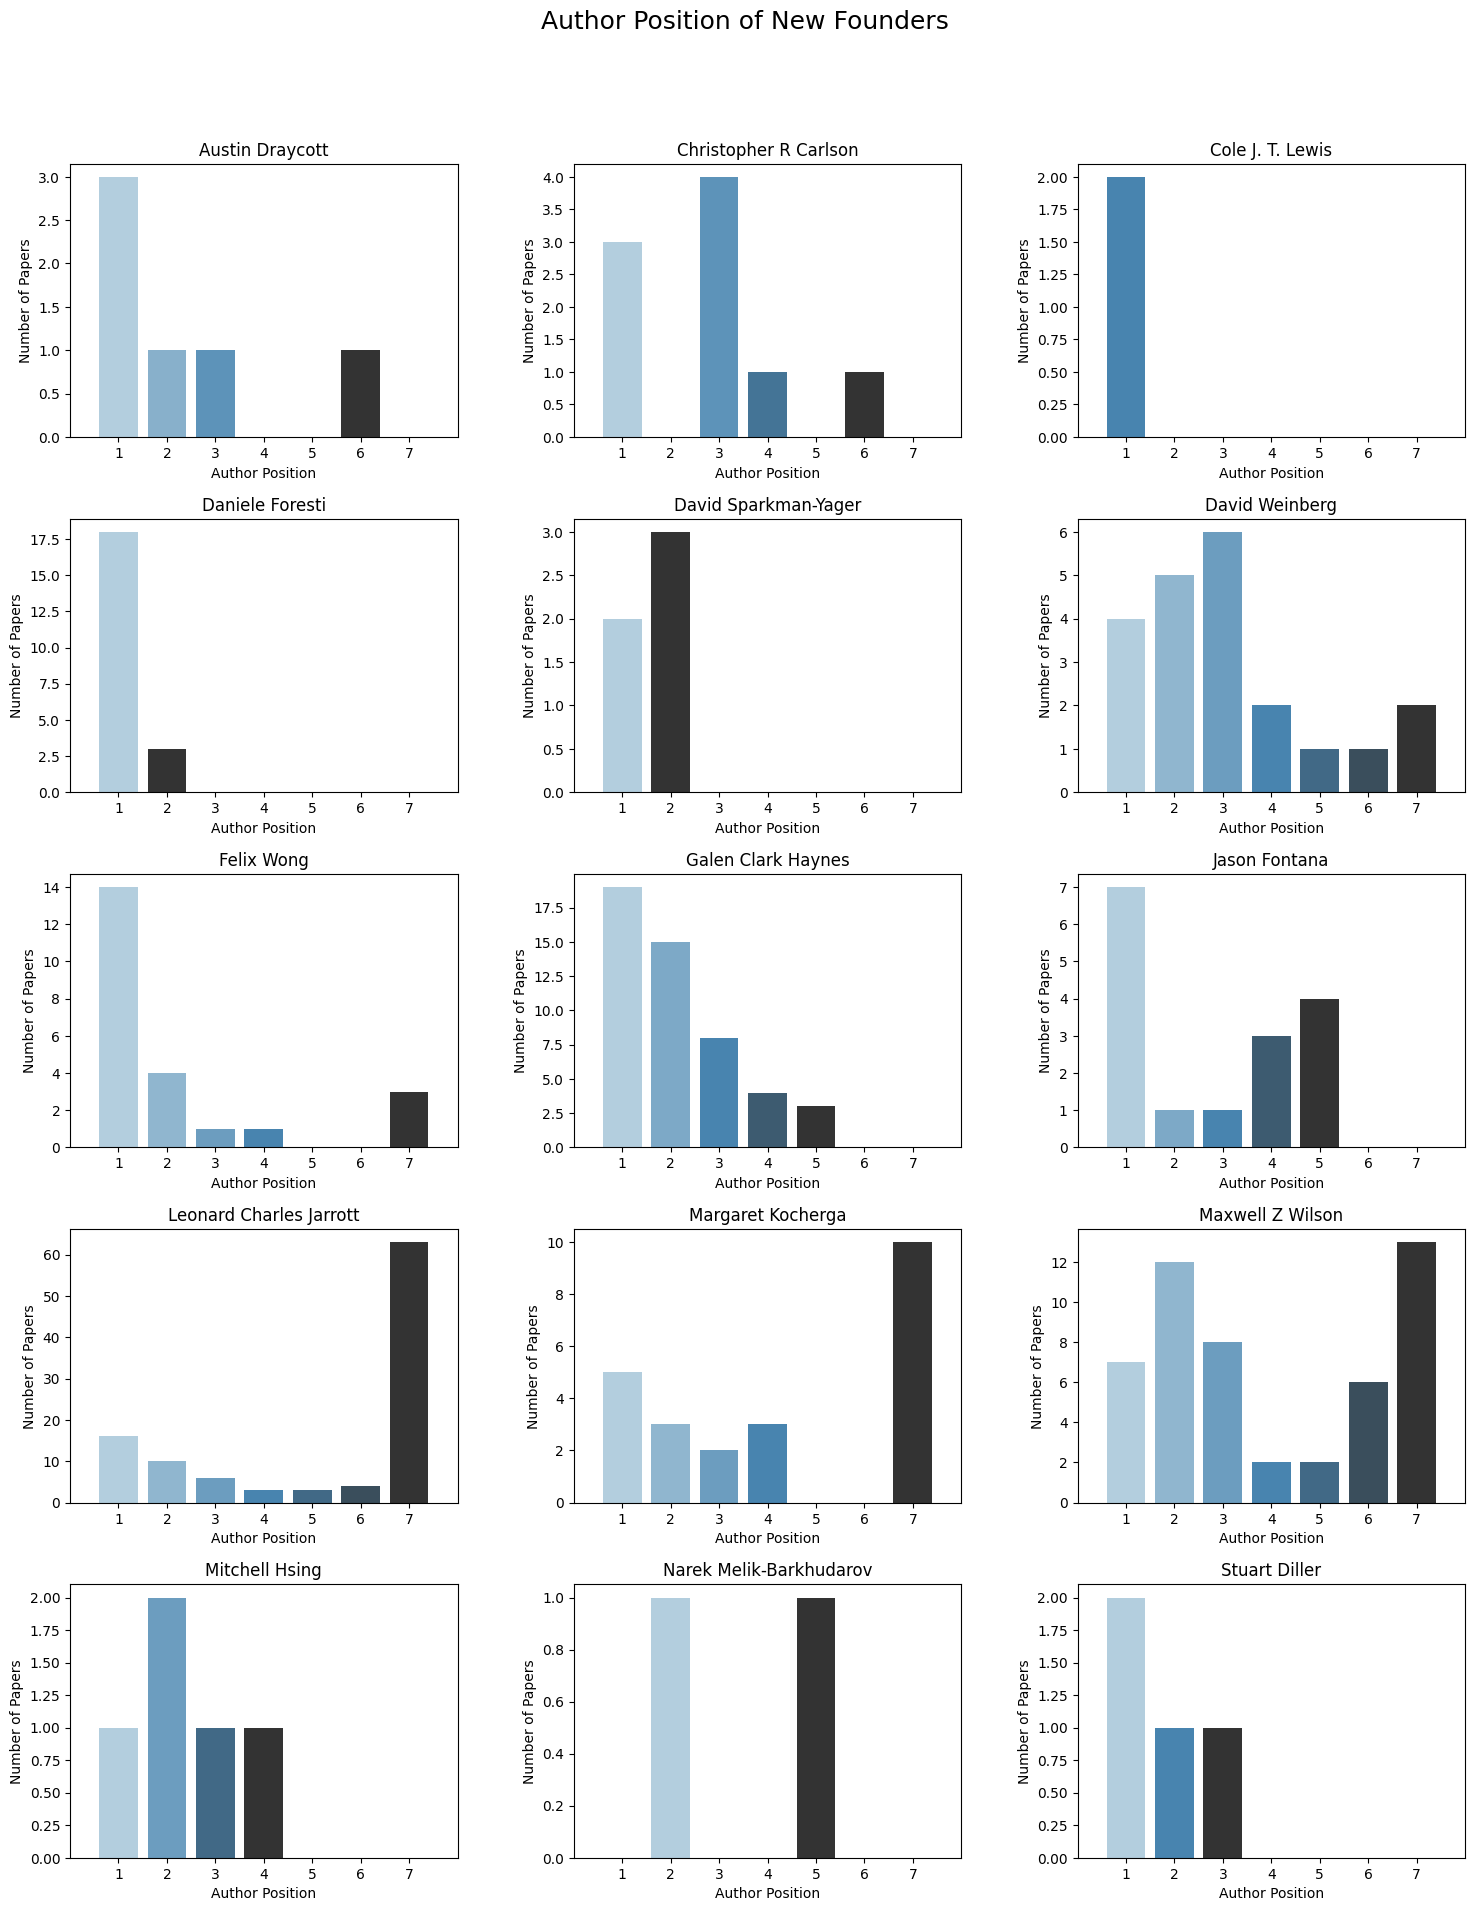

In [ ]:
plot_author_pos(founder_pos, 5, 3, (18, 22), "Author Position of New Founders")

In [ ]:
founder_pivot = citations_by_year(founder_pubs)

columns = list(founder_pivot.columns)
columns[4], columns[5] = columns[5], columns[4]
columns[1], columns[13] = columns[13], columns[1]
columns[2], columns[11] = columns[11], columns[2]
columns[5], columns[11] = columns[11], columns[5]
founder_pivot = founder_pivot[columns]

founder_pivot.head(5)

researcher,Austin Draycott,Narek Melik-Barkhudarov,Maxwell Z Wilson,Daniele Foresti,David Weinberg,Cole J. T. Lewis,Felix Wong,Galen Clark Haynes,Jason Fontana,Leonard Charles Jarrott,Margaret Kocherga,David Sparkman-Yager,Mitchell Hsing,Christopher R Carlson,Stuart Diller
year,,,,,,,,,,,,,,,
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,754.0,0.0,0.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,37.0,0.0,0.0,0.0,181.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0


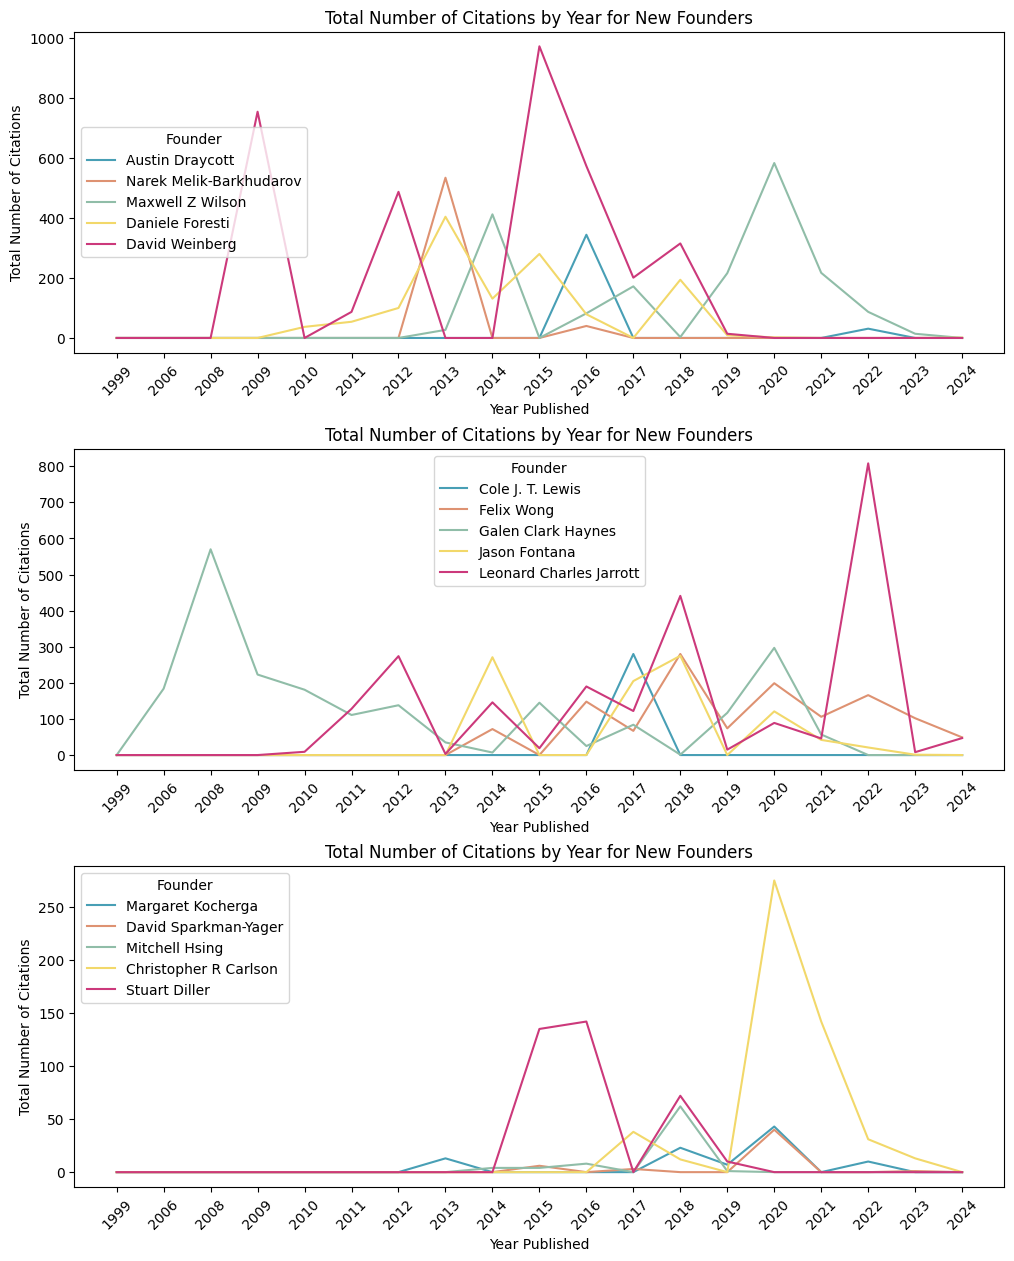

In [ ]:
plot_across_years(founder_pivot, 5, 3, 1, (12, 15), "Total Number of Citations", "Total Number of Citations by Year for New Founders")

In [ ]:
founder_pubs["journal_with_field"] = founder_pubs["publication"].apply(create_journal_with_fields)

In [ ]:
founder_pubs["nature"] = founder_pubs["journal_with_field"].apply(create_nature)

In [ ]:
founder_pubs["ieee"] = founder_pubs["journal_with_field"].apply(create_ieee)

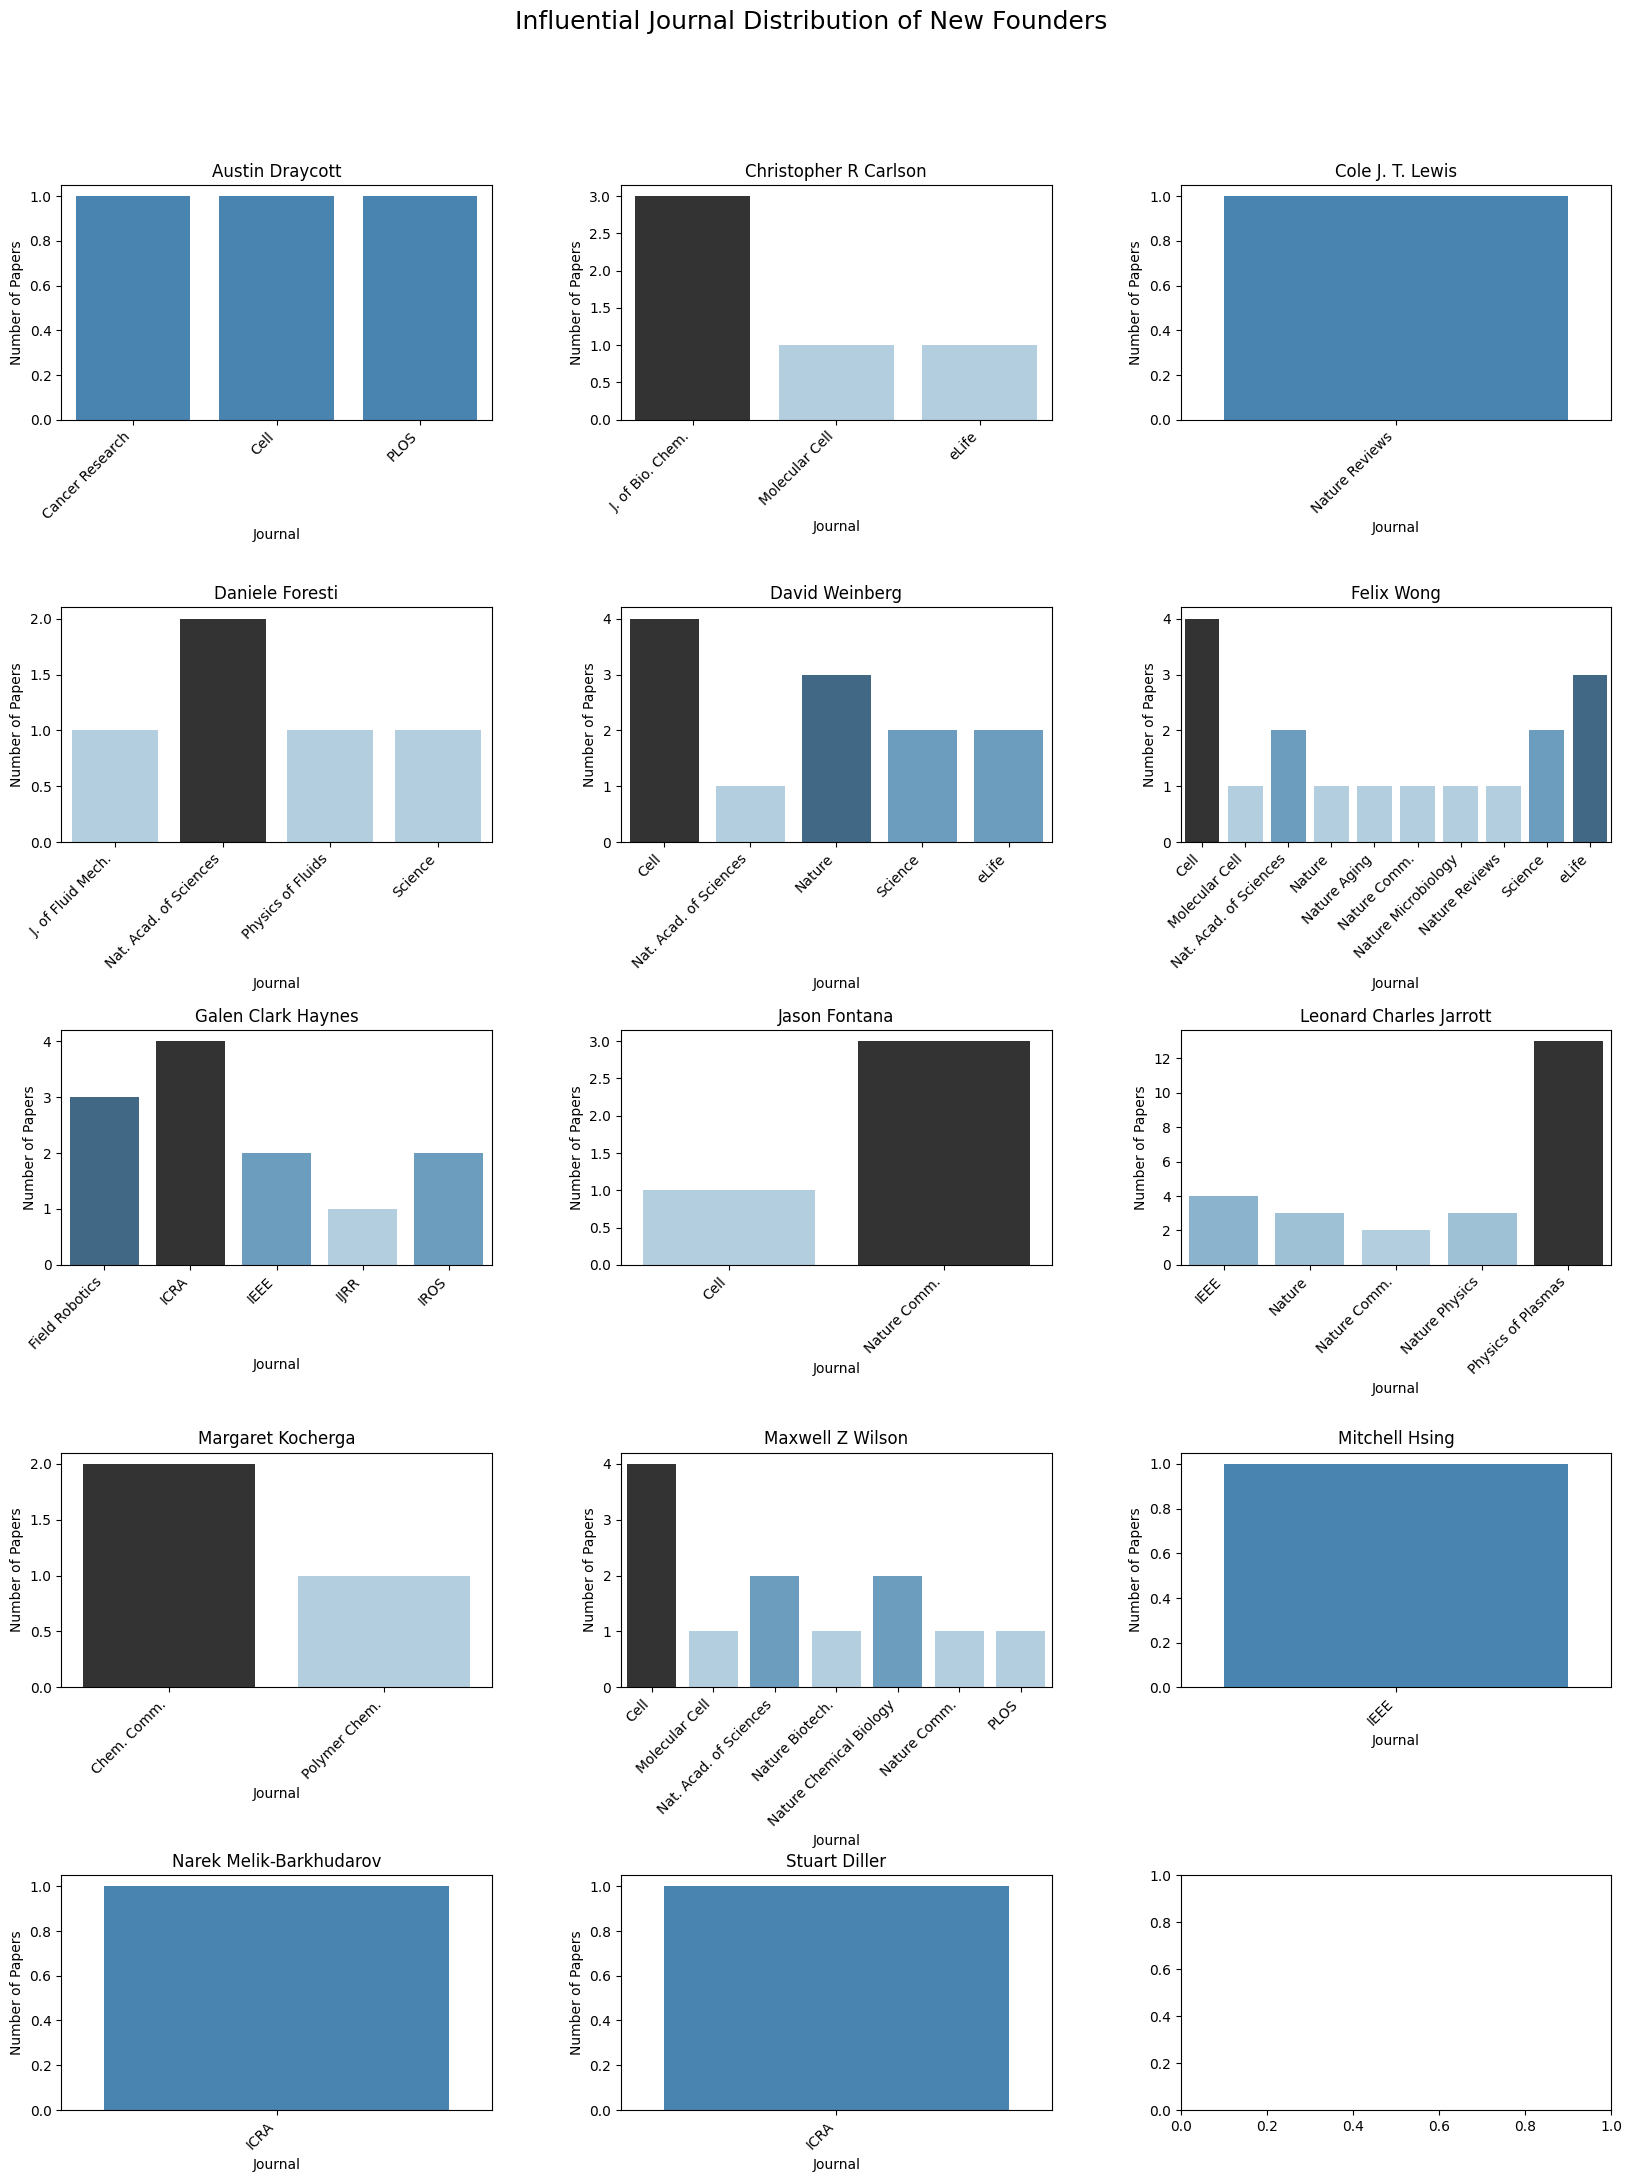

In [ ]:
plot_journal(founder_pubs, 5, 3, (20, 25), "Influential Journal Distribution of New Founders")

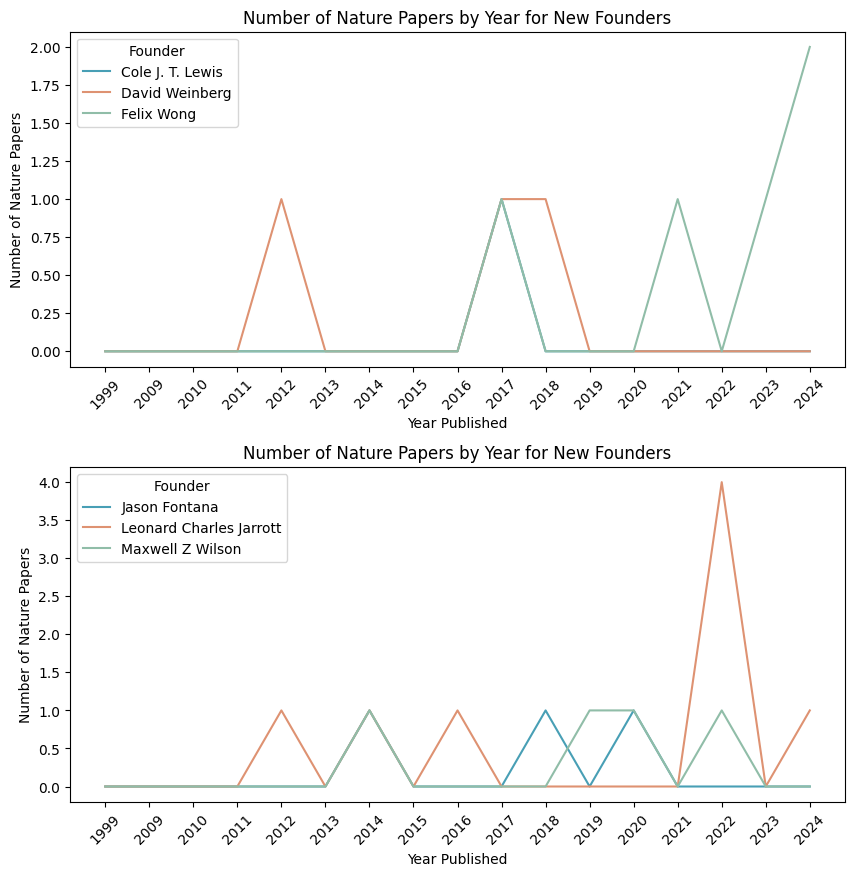

In [ ]:
plot_nature(founder_pubs, 3, 2, 1, (10, 10), "Number of Nature Papers", "Number of Nature Papers by Year for New Founders")

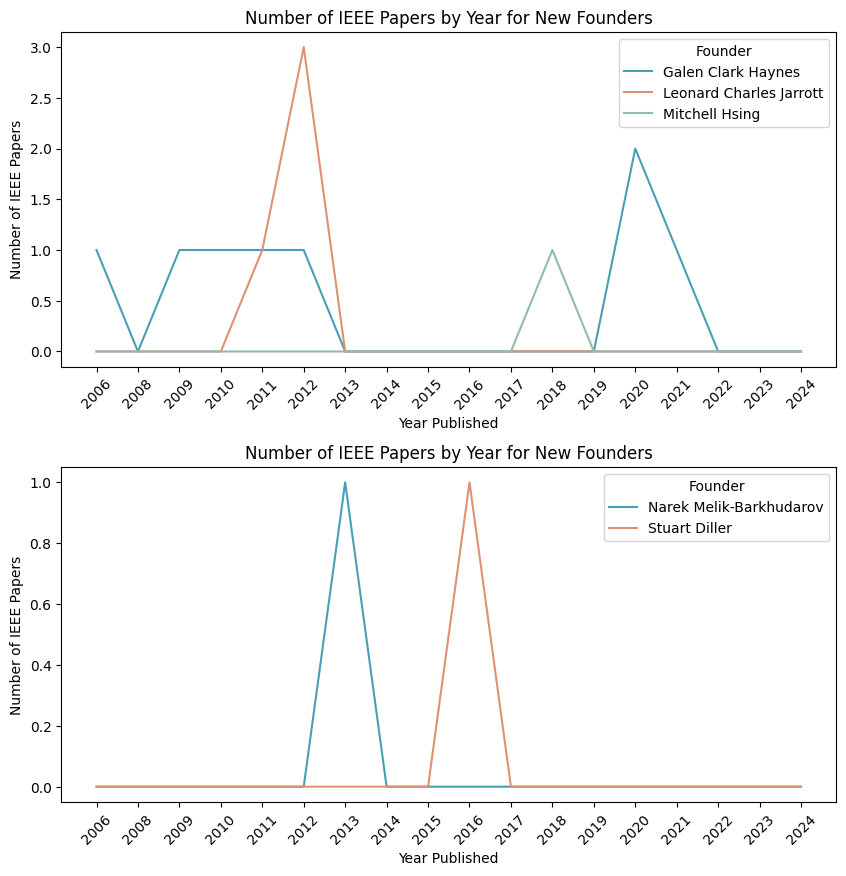

In [ ]:
plot_ieee(founder_pubs, 3, 2, 1, (10, 10), "Number of IEEE Papers", "Number of IEEE Papers by Year for New Founders")